In [1]:
# Function to read the static file
def read_static(static_file):
    with open(static_file, 'r') as f:
        num_particles = int(f.readline().strip())
        square_side_length = float(f.readline().strip())
        particles = []
        for _ in range(num_particles):
            radius, prop = map(float, f.readline().strip().split())
            particles.append({'radius': radius, 'prop': prop})
    return square_side_length, particles

# Function to read the dynamic file
def read_dynamic(dynamic_file):
    with open(dynamic_file, 'r') as f:
        positions = []
        f.readline()  # skip first line
        for line in f:
            x, y = map(float, line.strip().split()[:2])
            positions.append({'x': x, 'y': y})
    return positions

static_file = "./particles_static.txt"
dynamic_file = "./particles_dynamic.txt"
output_file = "./out.txt"

In [2]:
square_side_length, particles = read_static(static_file)
square_side_length, particles

(5.0,
 [{'radius': 0.25, 'prop': 1.0},
  {'radius': 0.25, 'prop': 1.0},
  {'radius': 0.25, 'prop': 1.0},
  {'radius': 0.25, 'prop': 1.0},
  {'radius': 0.25, 'prop': 1.0},
  {'radius': 0.25, 'prop': 1.0},
  {'radius': 0.25, 'prop': 1.0},
  {'radius': 0.25, 'prop': 1.0},
  {'radius': 0.25, 'prop': 1.0},
  {'radius': 0.25, 'prop': 1.0}])

In [3]:
positions = read_dynamic(dynamic_file)
positions

[{'x': 3.8, 'y': 4.8},
 {'x': 4.8, 'y': 4.4},
 {'x': 4.5, 'y': 3.8},
 {'x': 4.7, 'y': 0.7},
 {'x': 2.6, 'y': 0.3},
 {'x': 2.2, 'y': 3.7},
 {'x': 3.3, 'y': 4.7},
 {'x': 4.7, 'y': 3.8},
 {'x': 4.1, 'y': 2.3},
 {'x': 3.6, 'y': 4.9}]

In [5]:
# Function to read the output file
def read_output(output_file):
    with open(output_file, 'r') as f:
        f.readline()  # skip exec time
        neighbors = {}
        for line in f:
            parts = line.strip().split('\t', 1)
            index = int(parts[0])
            if len(parts) == 2 and parts[1]:
                neighbor_list = parts[1]
                neighbors[index] = list(map(int, neighbor_list.split(', ')))
            else:
                neighbors[index] = []
    return neighbors

neighbors = read_output(output_file)
neighbors

{0: [1, 2, 9, 6],
 1: [0, 2, 7],
 2: [0, 1, 7],
 3: [],
 4: [],
 5: [],
 6: [0, 9],
 7: [1, 2],
 8: [],
 9: [0, 6]}

/var/folders/h2/hx52pn_90z7fhl6v5wtvd5nm0000gn/T/ipykernel_80753/3710934965.py:30: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


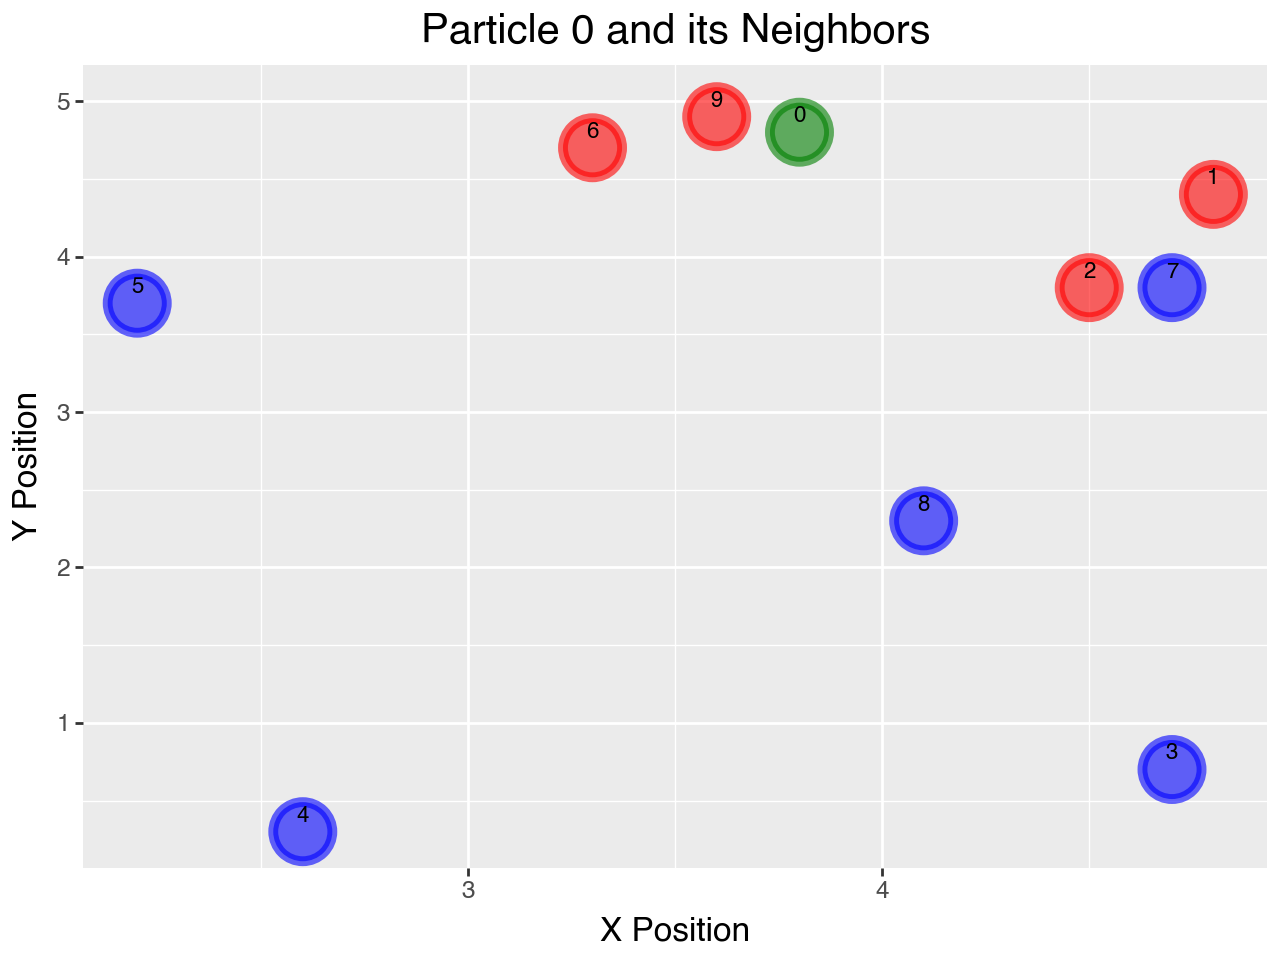

In [15]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_text, theme, element_text, labs, scale_size, scale_color_manual

def plot_particle_with_neighbors(positions, particles, neighbors, particle_id):
    data = pd.DataFrame({
        'x': [pos['x'] for pos in positions],
        'y': [pos['y'] for pos in positions],
        'size': [particle['radius'] * 50 for particle in particles],  # Scale the radius for better visibility
        'color': ['blue'] * len(positions),
        'index': [str(i) for i in range(len(particles))]
    })

    # Set the color for the selected particle and its neighbors
    data.loc[particle_id, 'color'] = 'red'
    for neighbor_id in neighbors.get(particle_id, []):
        data.loc[neighbor_id, 'color'] = 'green'

    p = (ggplot(data, aes(x='x', y='y', size='size', color='color', label='index'))
         + geom_point(alpha=0.6, stroke=2)
         + geom_text(aes(label='index'), nudge_y=0.1, size=8, color='black')
         + scale_size(range=(1, 10))
         + scale_color_manual(values=['blue', 'red', 'green'])
         + labs(title=f"Particle {particle_id} and its Neighbors", x="X Position", y="Y Position")
         + theme(legend_position='none',
                 plot_title=element_text(size=15, face='bold'),
                 axis_title_x=element_text(size=12),
                 axis_title_y=element_text(size=12))
        )

    print(p)

# Example usage
plot_particle_with_neighbors(positions, particles, neighbors, 0)